In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense, Normalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2
import seaborn as sns

In [2]:
df = pd.read_csv('BankNote_Authentication.csv')
df

variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [5]:
df.describe()

variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000

<AxesSubplot:>

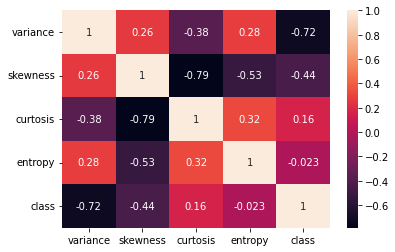

In [6]:
sns.heatmap(df.corr(), annot=True)

Text(0.5, 1.0, 'Skewness / Entropy')

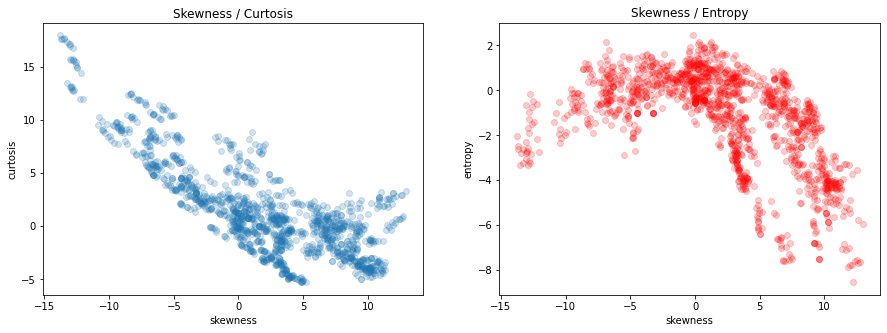

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(df['skewness'], df['curtosis'], alpha=0.2)
ax[0].set_xlabel('skewness')
ax[0].set_ylabel('curtosis')
ax[0].set_title('Skewness / Curtosis')

ax[1].scatter(df['skewness'], df['entropy'], alpha=0.2, c='red')
ax[1].set_xlabel('skewness')
ax[1].set_ylabel('entropy')
ax[1].set_title('Skewness / Entropy')

In [8]:
X_train = df.iloc[:, :-1].values
y_train = df.iloc[:, -1].values

X_train = X_train.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.7)
X_test, X_cv, y_test, y_cv = train_test_split(X_test, y_test, test_size=0.5)

In [9]:
print(f'Shape of X_train is {X_train.shape} and y_train is {y_train.shape}')
print(f'Shape of X_cv is {X_cv.shape} and y_cv is {y_cv.shape}')
print(f'Shape of X_test is {X_test.shape} and y_test is {y_test.shape}')

Shape of X_train is (960, 4) and y_train is (960,)
Shape of X_cv is (206, 4) and y_cv is (206,)
Shape of X_test is (206, 4) and y_test is (206,)


In [10]:
norm = Normalization()
norm.adapt(X_train)
Xn_train = norm(X_train)
Xn_cv = norm(X_cv)
Xn_test = norm(X_test)

In [11]:
model = Sequential([
    tf.keras.Input(shape=(Xn_train.shape[1],)),
    Dense(units=5, activation='relu', name='Layer1', kernel_regularizer=L2(0.001)),
    Dense(units=1, activation='linear', name='output')
], name='mymodel')

model.compile(
    loss=BinaryCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=0.001)
)

history = model.fit(Xn_train, y_train, epochs=1000,
         validation_data=[Xn_cv, y_cv])

Epoch 1/1000
30/30 [==============================] - 0s 5ms/step - loss: 0.6216 - val_loss: 0.5641
Epoch 2/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5716 - val_loss: 0.5306
Epoch 3/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.5303 - val_loss: 0.5034
Epoch 4/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4970 - val_loss: 0.4798
Epoch 5/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4685 - val_loss: 0.4587
Epoch 6/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4435 - val_loss: 0.4384
Epoch 7/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4203 - val_loss: 0.4183
Epoch 8/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.3985 - val_loss: 0.3987
Epoch 9/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.3773 - val_loss: 0.3786
Epoch 10/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.3564 - val_loss: 0.3597

30/30 [==============================] - 0s 1ms/step - loss: 0.0462 - val_loss: 0.0549
Epoch 83/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0459 - val_loss: 0.0544
Epoch 84/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0455 - val_loss: 0.0540
Epoch 85/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0451 - val_loss: 0.0535
Epoch 86/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0448 - val_loss: 0.0531
Epoch 87/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0444 - val_loss: 0.0527
Epoch 88/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0441 - val_loss: 0.0523
Epoch 89/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0438 - val_loss: 0.0520
Epoch 90/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0435 - val_loss: 0.0515
Epoch 91/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0431 - val_loss: 0.0511
Epoc

30/30 [==============================] - 0s 1ms/step - loss: 0.0270 - val_loss: 0.0321
Epoch 163/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0269 - val_loss: 0.0319
Epoch 164/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0268 - val_loss: 0.0318
Epoch 165/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0266 - val_loss: 0.0316
Epoch 166/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0265 - val_loss: 0.0315
Epoch 167/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0264 - val_loss: 0.0314
Epoch 168/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0263 - val_loss: 0.0312
Epoch 169/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0262 - val_loss: 0.0311
Epoch 170/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0260 - val_loss: 0.0309
Epoch 171/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0259 - val_loss: 0.

30/30 [==============================] - 0s 1ms/step - loss: 0.0197 - val_loss: 0.0234
Epoch 243/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0196 - val_loss: 0.0233
Epoch 244/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0195 - val_loss: 0.0233
Epoch 245/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0195 - val_loss: 0.0232
Epoch 246/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0194 - val_loss: 0.0230
Epoch 247/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0194 - val_loss: 0.0232
Epoch 248/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0193 - val_loss: 0.0228
Epoch 249/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0192 - val_loss: 0.0228
Epoch 250/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0192 - val_loss: 0.0228
Epoch 251/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0191 - val_loss: 0.

30/30 [==============================] - 0s 1ms/step - loss: 0.0155 - val_loss: 0.0185
Epoch 323/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0154 - val_loss: 0.0185
Epoch 324/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0154 - val_loss: 0.0183
Epoch 325/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0153 - val_loss: 0.0183
Epoch 326/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0153 - val_loss: 0.0183
Epoch 327/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0153 - val_loss: 0.0182
Epoch 328/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0153 - val_loss: 0.0182
Epoch 329/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0152 - val_loss: 0.0181
Epoch 330/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0152 - val_loss: 0.0182
Epoch 331/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0152 - val_loss: 0.

30/30 [==============================] - 0s 1ms/step - loss: 0.0128 - val_loss: 0.0153
Epoch 403/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0127 - val_loss: 0.0152
Epoch 404/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.0128 - val_loss: 0.0152
Epoch 405/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0127 - val_loss: 0.0150
Epoch 406/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0127 - val_loss: 0.0150
Epoch 407/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0126 - val_loss: 0.0150
Epoch 408/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0126 - val_loss: 0.0150
Epoch 409/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0126 - val_loss: 0.0150
Epoch 410/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0126 - val_loss: 0.0150
Epoch 411/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0125 - val_loss: 0.

30/30 [==============================] - 0s 1ms/step - loss: 0.0109 - val_loss: 0.0128
Epoch 483/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0109 - val_loss: 0.0129
Epoch 484/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0109 - val_loss: 0.0129
Epoch 485/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0109 - val_loss: 0.0129
Epoch 486/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0130
Epoch 487/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0130
Epoch 488/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0128
Epoch 489/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0128
Epoch 490/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0129
Epoch 491/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.

30/30 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0113
Epoch 563/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0113
Epoch 564/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0113
Epoch 565/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0094 - val_loss: 0.0113
Epoch 566/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0113
Epoch 567/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0094 - val_loss: 0.0112
Epoch 568/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0094 - val_loss: 0.0112
Epoch 569/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0094 - val_loss: 0.0111
Epoch 570/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0094 - val_loss: 0.0112
Epoch 571/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0094 - val_loss: 0.

30/30 [==============================] - 0s 1ms/step - loss: 0.0085 - val_loss: 0.0099
Epoch 643/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0084 - val_loss: 0.0102
Epoch 644/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0084 - val_loss: 0.0100
Epoch 645/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0084 - val_loss: 0.0100
Epoch 646/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0084 - val_loss: 0.0099
Epoch 647/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0084 - val_loss: 0.0100
Epoch 648/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0084 - val_loss: 0.0099
Epoch 649/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0084 - val_loss: 0.0098
Epoch 650/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0084 - val_loss: 0.0098
Epoch 651/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0083 - val_loss: 0.

30/30 [==============================] - 0s 1ms/step - loss: 0.0077 - val_loss: 0.0088
Epoch 723/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0076 - val_loss: 0.0092
Epoch 724/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0076 - val_loss: 0.0090
Epoch 725/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0076 - val_loss: 0.0091
Epoch 726/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0076 - val_loss: 0.0089
Epoch 727/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0076 - val_loss: 0.0089
Epoch 728/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0075 - val_loss: 0.0089
Epoch 729/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0075 - val_loss: 0.0089
Epoch 730/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0075 - val_loss: 0.0092
Epoch 731/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0075 - val_loss: 0.

30/30 [==============================] - 0s 1ms/step - loss: 0.0069 - val_loss: 0.0082
Epoch 803/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0069 - val_loss: 0.0082
Epoch 804/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0069 - val_loss: 0.0080
Epoch 805/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0069 - val_loss: 0.0082
Epoch 806/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0069 - val_loss: 0.0080
Epoch 807/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0069 - val_loss: 0.0082
Epoch 808/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 0.0081
Epoch 809/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0069 - val_loss: 0.0081
Epoch 810/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 0.0083
Epoch 811/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 0.

30/30 [==============================] - 0s 1ms/step - loss: 0.0063 - val_loss: 0.0074
Epoch 883/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0063 - val_loss: 0.0076
Epoch 884/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0063 - val_loss: 0.0074
Epoch 885/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0063 - val_loss: 0.0073
Epoch 886/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0063 - val_loss: 0.0074
Epoch 887/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0063 - val_loss: 0.0074
Epoch 888/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0063 - val_loss: 0.0073
Epoch 889/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0063 - val_loss: 0.0074
Epoch 890/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0063 - val_loss: 0.0073
Epoch 891/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0063 - val_loss: 0.

30/30 [==============================] - 0s 1ms/step - loss: 0.0059 - val_loss: 0.0068
Epoch 963/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.0069
Epoch 964/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.0068
Epoch 965/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.0067
Epoch 966/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.0070
Epoch 967/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.0067
Epoch 968/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.0068
Epoch 969/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.0069
Epoch 970/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0057 - val_loss: 0.0067
Epoch 971/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.

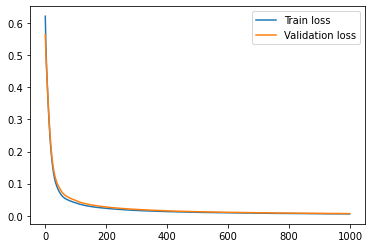

In [12]:
losses = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(len(losses)), losses, label='Train loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation loss')
plt.legend();

In [13]:
f_x = tf.nn.sigmoid(model.predict(Xn_test))
yhat = f_x.numpy()
yhat[yhat >= 0.5] = 1
yhat[yhat < 0.5] = 0
yhat = yhat.reshape(-1, )

7/7 [==============================] - 0s 998us/step


In [14]:
err = ((y_test == yhat).sum() / y_test.size) * 100
print(f'{err:.2f}% of the test set is classified correctly (i.e. {(y_test == yhat).sum()} out of {y_test.size})')

100.00% of the test set is classified correctly (i.e. 206 out of 206)


In [15]:
y_test

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [16]:
yhat

array([1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1.], dtype=float32)

In [17]:
loss_train = model.evaluate(Xn_train, y_train)
loss_cv = model.evaluate(Xn_cv, y_cv)
loss_test = model.evaluate(Xn_test, y_test)
print(f'loss train {loss_train:0.5f}')
print(f'loss cv {loss_cv:0.5f}')
print(f'loss test {loss_test:0.5f}')

7/7 [==============================] - 0s 831us/step - loss: 0.0075
loss train 0.00553
loss cv 0.00658
loss test 0.00747
